<div style="border:solid Chocolate 2px; padding: 40px">

<b>Юлия, привет!👋</b>

Меня зовут Александр Куимов, я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты"😏 Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом!

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты также можешь реагировать на мои комментарии своими, выделяя их цветами и наиболее понравившимся тебе способом оформления, но явно  отличающимся от моих комментариев. Это нужно, чтобы не создавалась путаница😉

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе датасаентистом. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

# Определение возраста покупателей

# Описание проекта

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
- Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
- Контролировать добросовестность кассиров при продаже алкоголя.  

Постройте модель, которая по фотографии определит приблизительный возраст человека. В вашем распоряжении набор фотографий людей с указанием возраста.

План выполнения проекта:
- провести предварительный анализ данных, выгрузить фотографии из датасета для оценки их корректности, проанализировать распределение данных;
- написать функцию для создания обучающей и тостовой выборки;
- написать функцию для создания модели;
- обучить модель, добиться искомой метрики MAE не более 7;
- написать выводы.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Вижу твое добавленное описание проекта. Молодец! Я бы посоветовал тебе чуть подробнее раскрыть план своей работы. Это поможет тебе расставлять акценты в выводах.

## Исследовательский анализ данных

Импортируем необходимые для исследования библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet import ResNet50

С помощью загрузчика извлеченм данные из папки

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

Found 7591 validated image filenames.


In [3]:
labels.shape

(7591, 2)

В предоставленном датасете всего 7591 фотография, при том что возрастых категорий как минимум можно выделить 5: дети, подростки, молодые люди, взрослые, пожилые. Но задача поставлена по другому, мы не классифицируем возрастные группы, а должны точно предсказать реальный возраст покупателя. Поэтому данных для подобной задачи крайне мало.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Размер выборки выведен. Можно тут еще добавить несколько слов, большой ли он, и как это скажется при обучении модели.

В папке найдено 7591 изображений. А в текстовом файле соотвествующие им значения реального возраста и приблизительного.

Построим диаграмму распределения возраста в выбрке

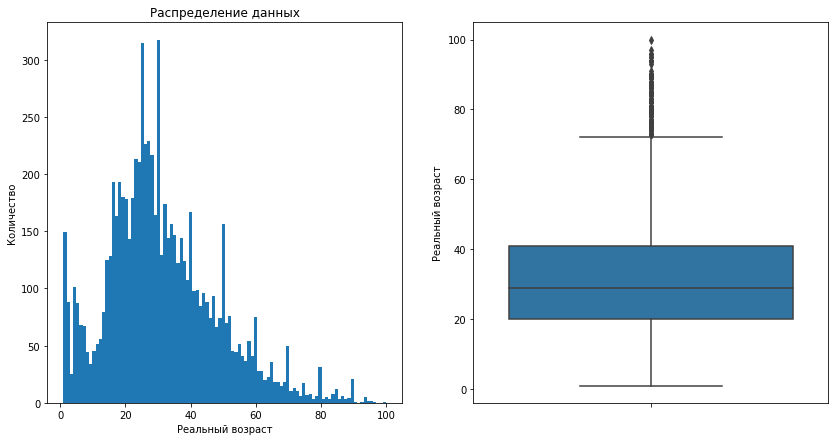

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

labels['real_age'].plot(kind='hist',bins=100, ax=ax[0])
ax[0].set_title('Распределение данных')
ax[0].set_ylabel('Количество')
ax[0].set_xlabel('Реальный возраст')

sns.boxplot(data=labels, y='real_age', ax=ax[1])
ax[1].set_ylabel('Реальный возраст')

plt.show()

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
Гистограмма целевого признака выведена. Раз у нас 100 различных возрастов, то и корзин следует прописать 100 штук.
        
Можно тут еще добавить, похоже ли распределение на простые, имеются ли "кластеры".

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Тут скорее не похоже на простые распределения,  наше распределение имеет "кластеры", также есть выбросы и наблюдается "бимодальность".

Основаная масса людей на фотографиях в возрасте от 20 лет до 40. Пожилых людей мало, но в реалной жизни так и есть. Судя по ящику с усами, наши данные предобработаны и вбросы минимальны. Экстремальных значений нет (люди возрастом более 100 лет встречаются крайне редко, а в нашей выборке и вовсе отсуствуют), а так же нет отрицательных значений.  
Само распределение похоже на нормальное, но с явными пиками на отметках 25 и 30 лет.

In [5]:
features, target = next(train_gen_flow)

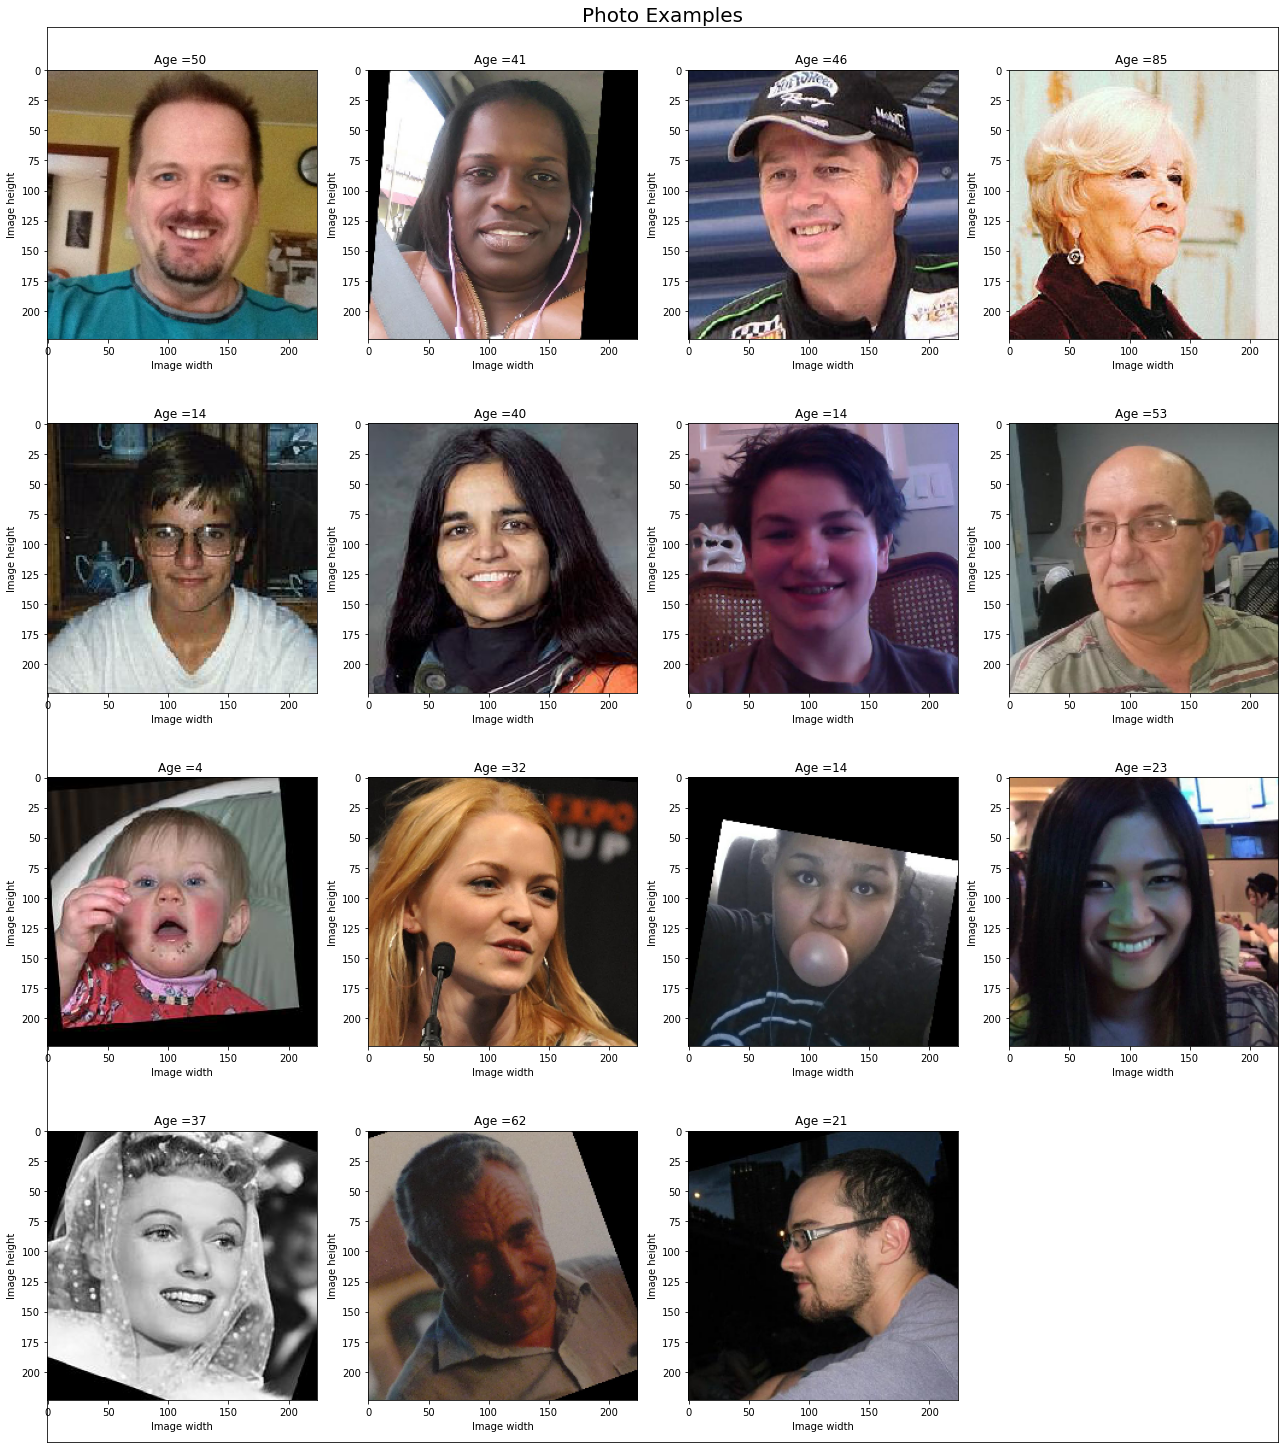

In [6]:
fig = plt.figure(figsize=(18,20))
plt.title('Photo Examples', {'fontsize': 20,
 'fontweight' : 10,
 'verticalalignment': 'baseline'})
plt.xticks([])
plt.yticks([])
plt.tight_layout()
for i in range(15):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.tight_layout() 
    plt.title('Age ={} '.format(target[i]), loc='center')    
    plt.xlabel('Image width')
    plt.ylabel('Image height')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Супер!

Судя по самим изображениям в датасете - они так же предобработаны. Крупным планом лица, где не хватает масштаба (не все изображения одного размера) и/или присутвует поворот фотографии (ориентация у изображений так же отличается) - добавлена черная рамка, посторонних предметов в кадре не пристсвует. В датасете находятся как цветные, так и чернобелые фотографии. 

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
Тут следует еще указать в выводе, какова общая ориентация фотографий, есть ли черно-белые фотографии, различается ли размер изображений?
Добавь, пожалуйста.
 </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Общая ориентация фотографий примерно одинакова, значит их не обязательно поворачивать, а размер изображений мы приведем к единому перед обучением модели.

## Обучение модели

Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке

def load_train(path):

    train_datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    train_datagen_flow = train_datagen.flow_from_dataframe(dataframe=pd.read_csv(path + 'labels.csv'),
                                                           directory=path + 'final_files/',
                                                           x_col='file_name',
                                                           y_col='real_age',
                                                           target_size=(224, 224),
                                                           batch_size=32,
                                                           class_mode='raw',
                                                           subset='training',
                                                           seed=12345)

    return train_datagen_flow


def load_test(path):

    test_datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    test_datagen_flow = test_datagen.flow_from_dataframe(dataframe=pd.read_csv(path + 'labels.csv'),
                                                         directory=path + 'final_files/',
                                                         x_col='file_name',
                                                         y_col='real_age',
                                                         target_size=(224, 224),
                                                         batch_size=32,
                                                         class_mode='raw',
                                                         subset='validation',
                                                         seed=12345)

    return test_datagen_flow

def create_model(input_shape):
    optimizer = Adam(lr=0.0001)
    model = Sequential()
    
    backbone = ResNet50(input_shape=input_shape,
                    weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                    include_top=False)
    
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu')) 


    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    return model




def train_model(model, train_data, test_data, epochs=10, steps_per_epoch=None, batch_size=32, validation_steps=None):

    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
        
    model.fit(train_data, 
              validation_data=test_data,
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2, shuffle=True)

    return model 

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Модель определена правильно!
        
Желательно еще добавить горизонтальный флип на тренировочной части. По сути это позволило бы увеличить выборку в 2 раза. Причем изображения полученные таким образом были бы неотличимы от настоящих.

Поняла про горизонтальный флип, но дело в том, что у нас огромная очередь на проверку проектов, все висит часами, а ребята сказали в группе, что добавление флима на сотые части улучшает искомую метрику, так что я не стала повторно проверять модель, но на будущее учла пожелания)

60/60 - 9s - loss: 72.2689 - mae: 6.2699
Test MAE: 6.2699


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отличный результат по метрике)

## Анализ обученной модели

Для обучения была выбрана архитектура ResNet: подаём выходные данные двух успешных свёрточных слоёв И обходим входные данные для следующего слоя. Это можно рассматривать как маленький классификатор, как сеть-в-сети, что отлично подходит для нашей задачи. Так же был использован оптимизатор Adam с дефолтными значениями. Функция октивации была выбрана Relu, т.к. эта задача не классификации, а прогнозирования. Искомой метрикой определен MAE.  
Мы получили необходимое качество модели на тестовой выборке. Но в целом,я не считаю правильным и целесообразным вообще применять к подобной задаче компьютерное зрение и нейронные сети. Это очень трудозатратно и при этом к реальности имеет слабое отношение, т.к. погрешность в возрасте +- 6 лет при продаже алкоголя, например, пахнет уголовной отвественностью! К тому же, косметология и пластическая хирургия, да и вообще вся бьюти индустрия не стоит на месте. Девушка может в 16 лет выглять на 32 или 30 летняя женщина может выглядеть как подросток. Ничего лучше проверки документа удостоверяющего личность еще не придумали. Может быть, когда всем людям вживят чипы с их паспортными данными и кассовые аппараты научатся эти самые чипы считывать, то будет рентально подключать машинное обучение для предложения товаров по акции, но это лишь мечты о светлом робатизированном будущем.  
Я считаю, что полученная задача не решит задачи, поставленной бизнесом. Гораздо эффективнее было бы классифицировать людей на возрастные группы (погрешность был

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
С интересом читал твой вывод)
- Пожалуйста, подробнее опиши использованную модель и параметры.
- Позволяет ли полученная модель решить поставленные бизнесом задачи, помимо контроля кассиров при продаже алкоголя?
      

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Выводы вполне логичные)

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Могу поделиться такими ссылками для углубленного изучения темы спринта:
    
- Курс от Stanford University: https://www.youtube.com/watch?v=vT1JzLTH4G4&list=PLC1qU-LWwrF64f4QKQT-Vg5Wr4qEE1Zxk
    
- Курс от Физтех-школы Прикладной Математики и Информатики МФТИ: https://vk.com/dlschool_mipt
    
- Курс Нейронные сети и компьютерное зрение от Sumsung: https://stepik.org/course/50352/promo#toc

## Чек-лист

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Исследовательский анализ данных выполнен
- [ ]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [ ]  MAE модели не больше 8
- [ ]  Код обучения модели скопирован в финальную тетрадь
- [ ]  Результат вывода модели на экран перенесён в финальную тетрадь
- [ ]  По итогам обучения модели сделаны выводы

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.1 <a class="tocSkip"> </h2>    
    
  
Юлия,    
у меня сложилось хорошее общее впечатление о проекте, тебе удалось неплохо справиться с проектом. Молодец! Загружены данные для анализа, изучен каждый параметр, модель построена и протестирована. Тебе удалось успешно справиться с первой задачей в области компьютерного зрения. Поздравляю!
    
Отмечу отдельные положительные моменты проекта🙂:
    
- радует, что проект хорошо структурирован, приятно проверять такие работы;
- есть красивые визуализации в проекте.
    
Есть несколько моментов всего, на которые стоит ещё раз взглянуть. 
Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства:

- Указать в выводе, какова общая ориентация фотографий, есть ли черно-белые фотографии, различается ли размер изображений.
- Исправить выводы при необходимости.
    
Если будут вопросы, обращайся, с удовольствием на них отвечу.  
</div>

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.2 <a class="tocSkip"> </h2>    
    
     
  
Юлия, теперь почти идеально, молодец! Принимаю твой проект)
    
    
В этом проекте все шаги отработаны. С интересом читал твои размышления, код и выводы. Что ещё для дальнейшего улучшения качества возможно сделать?
    
Опишу здесь некоторые идеи:
    
1. Качество данных на входе: оценить еще раз возраст по фото, возможно в выборке есть выбросы.
2. Анализ ошибок: к примеру модель сильно ошибается на сегменте пожилых людей, зато почти идеально работает с детьми. Тогда мы поймем, каких возрастов фото было бы хорошо добавить в выборку для дообучения.
3. Дополнительно изучить распределение целевого признака, возможно что выборка была составлена неслучайным образом (видна небольшая бимодальность), посмотреть, каких возрастных групп представлено мало, чтобы их потом добавить в выборку.
    
Но цель нашего проекта достигнута. Рад был тебе помочь)
    
Преподаватель в Slack будет рад помочь, если у тебя появятся вопросы. Удачи тебе в финальном проекте!
  
</div>